In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset
We will use a dataset with hike regions with ratings.<br>
You can find the original repo and dataset [here](https://github.com/oschow/take-a-hike).

In [157]:
# User data
data = 'https://raw.githubusercontent.com/oschow/take-a-hike/master/AllTrails/data/all_ratings_matrix.csv'
df = pd.read_csv(data)

# Features
#data_features = 'https://raw.githubusercontent.com/oschow/take-a-hike/master/AllTrails/data/all_hikes_with_hike_id.csv'
data_features = 'https://raw.githubusercontent.com/oschow/take-a-hike/master/AllTrails/data/all_hikes_with_hike_name.csv'
df_features = pd.read_csv(data_features)

In [158]:
print(f'| Dataset shapes |\nUser ratings: {len(df)}\nHike features: {len(df_features)}')

| Dataset shapes |
User ratings: 23842
Hike features: 1487


In [159]:
df_features.head(1)

,hike_name,hike_region,total_distance,elevation_gain,hike_difficulty,stars,hike_id,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views
0,Maxwell Falls Lower Trail,Arapaho National Forest,4.2,1008,2,3.9,hike0,1,0,0,1,0,1,1,1,0,1,0,0


In [160]:
df.head(1)

,hike_id,variable,value
0,hike43,user1,4


Rename columns `variable` and `value` for `df`

In [161]:
# Rename variable to user id
df['user_id'] = df['variable'] 
df = df.drop('variable', 1)

# Rename value to rating
df['rating'] = df['value'] 
df = df.drop('value', 1)

Remove string and convert to int

In [162]:
# Remove string
df['hike_id'] = df.hike_id.str.strip('hike')

df['user_id'] = df.user_id.str.strip('user')

# Convert to int
df['hike_id'] = pd.to_numeric(df.hike_id, errors='coerce')

df['user_id'] = pd.to_numeric(df.user_id, errors='coerce')

# Change order of column names
df = df[['user_id', 'hike_id', 'rating']]

In [163]:
# Updated df
df.head(1)

,user_id,hike_id,rating
0,1,43,4


Remove string and convert to int

In [164]:
# Remove string
df_features['hike_id'] = df_features.hike_id.str.strip('hike')

# Convert to int
df_features['hike_id'] = pd.to_numeric(df_features.hike_id, errors='coerce')

In [165]:
df_features.head(1)

,hike_name,hike_region,total_distance,elevation_gain,hike_difficulty,stars,hike_id,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views
0,Maxwell Falls Lower Trail,Arapaho National Forest,4.2,1008,2,3.9,0,1,0,0,1,0,1,1,1,0,1,0,0


Change order of column names

In [166]:
# Change order of columns
df_features = df_features[['hike_id', 'hike_name', 'hike_region','total_distance','elevation_gain','hike_difficulty','stars','loop', 'out_and_back', 'point_to_point','dog_friendly', 'kid_friendly', 'camping', 'waterfall', 'river','lake', 'wildflowers', 'wildlife','views']]

# Drop "stars"
df_features = df_features.drop('stars', axis=1)
df_features.head(1)

,hike_id,hike_name,hike_region,total_distance,elevation_gain,hike_difficulty,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views
0,0,Maxwell Falls Lower Trail,Arapaho National Forest,4.2,1008,2,1,0,0,1,0,1,1,1,0,1,0,0


EDA

In [167]:
df.describe()

,user_id,hike_id,rating
count,23842.000000,23842.000000,23842.000000
mean,5913.570338,243.372620,4.240164
std,3406.794046,305.067251,0.829412
min,1.000000,0.000000,0.000000
25%,2934.000000,30.000000,4.000000
50%,5889.500000,115.000000,4.000000
75%,8877.000000,342.000000,5.000000
max,11891.000000,1486.000000,5.000000


In [168]:
df_features.describe()

,hike_id,total_distance,elevation_gain,hike_difficulty,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,743.000000,7.742636,1726.087424,1.914593,0.342300,0.600538,0.057162,0.503026,0.405514,0.134499,0.111634,0.236718,0.271015,0.675185,0.560188,0.750504
std,429.404238,8.705549,1652.256755,0.726426,0.474639,0.489953,0.232230,0.500159,0.491157,0.341302,0.315022,0.425211,0.444634,0.468463,0.496531,0.432867
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,371.500000,3.200000,501.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,743.000000,6.000000,1320.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1114.500000,9.900000,2427.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1486.000000,230.600000,20714.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
type(df_features.iloc[:, 3:])

pandas.core.frame.DataFrame

## Normalize the values
We need to normalize our data as we have values that are far off each other. As an example we have a mean of the elevation_gain at 1652.256755 and mean of dog_friendly at 0.500159. <br>
As we are using a clustering algorithm we are calculating distance from each cluster and point.

In [170]:
from sklearn.preprocessing import MinMaxScaler

X = df_features.iloc[:, 3:].values
scaler = MinMaxScaler()
rescale = scaler.fit_transform(X)
df_scaled = pd.DataFrame(rescale, columns=['total_distance','elevation_gain','hike_difficulty','loop', 'out_and_back', 'point_to_point','dog_friendly', 'kid_friendly', 'camping', 'waterfall', 'river','lake', 'wildflowers', 'wildlife','views'])
df_scaled.head()


,total_distance,elevation_gain,hike_difficulty,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views
0,0.018213,0.048663,0.5,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.014744,0.079705,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.016912,0.048663,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.015611,0.095394,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.014310,0.037028,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [171]:
X2 = df_features.iloc[:, :3]

In [172]:
df_features = pd.merge(X2, df_scaled, left_index=True, right_index=True)
df_features.head()

,hike_id,hike_name,hike_region,total_distance,elevation_gain,hike_difficulty,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views
0,0,Maxwell Falls Lower Trail,Arapaho National Forest,0.018213,0.048663,0.5,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1,Royal Arch Trail,Chautauqua Park,0.014744,0.079705,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,Beaver Brook /Chavez Trail Loop,Genesee Park,0.016912,0.048663,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,3,The Incline Trail,Manitou Park Recreation Area,0.015611,0.095394,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,4,Emerald Lake Trail,Rocky Mountain National Park,0.014310,0.037028,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


## Pivot table

In [173]:
# Merge dataframes
merged_df = pd.merge(df, df_features, on='hike_id')

# Create pivot table
df_pivot = pd.pivot_table(merged_df, index='user_id', columns='hike_region', values='rating')

print(f'Pivot tavle shape: {len(df_pivot)}')

# First 5 rows, and 10 columns
df_pivot.iloc[5000:8000, :10]

Pivot tavle shape: 11891


hike_region,Ajax Park,Alamosa National Wildlife Refuge,Alderfer / Three Sisters Park,"Almont, Colorado",American Flats Wilderness Area,Antlers Park,Apex Open Space Park,Arapaho National Forest,Arkansas Headwaters Recreation Area,"Arvada, Colorado"
user_id,,,,,,,,,,
5001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Helper functions

In [174]:
def get_most_rated_hikes(hike_ratings, max_number_of_hikes):
    # 1- Count
    hike_ratings = hike_ratings.append(hike_ratings.count(), ignore_index=True)
    # 2- sort
    hike_ratings_sorted = hike_ratings.sort_values(len(hike_ratings)-1, axis=1, ascending=False)
    hike_ratings_sorted = hike_ratings_sorted.drop(hike_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_hikes = hike_ratings_sorted.iloc[:, :max_number_of_hikes]
    return most_rated_hikes

In [175]:
def get_users_who_rate_the_most(most_rated_hikes, max_number_of_hikes):
    # Get most voting users
    # 1- Count
    most_rated_hikes['counts'] = pd.Series(most_rated_hikes.count(axis=1))
    # 2- Sort
    most_rated_hikes_users = most_rated_hikes.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_hikes_users_selection = most_rated_hikes_users.iloc[:max_number_of_hikes, :]
    most_rated_hikes_users_selection = most_rated_hikes_users_selection.drop(['counts'], axis=1)
    
    return most_rated_hikes_users_selection

In [176]:
def sort_by_rating_density(df, n_hikes, n_users):
    most_rated_hikes = get_most_rated_hikes(df, n_hikes)
    most_rated_hikes = get_users_who_rate_the_most(most_rated_hikes, n_users)
    return most_rated_hikes

## Sparse matrix

In [177]:
from scipy.sparse import csr_matrix
most_rated_hikes = get_most_rated_hikes(df_pivot, 300)
sparse = most_rated_hikes.astype('Sparse')
coo = sparse.sparse.to_coo()

## Kmeans clustering

In [178]:
from sklearn.cluster import KMeans 
# K range to iterate
K= range(1,10)

# Within cluster sum of squared
wss= []

for k in K:
  kmeans= KMeans(n_clusters=k, algorithm='full')
  kmeans= kmeans.fit(coo)
  wss_iter= kmeans.inertia_
  wss.append(wss_iter)

In [179]:
# Centroids
centroids = pd.DataFrame({'Clusters': K, 'WSS': wss})
centroids

,Clusters,WSS
0,1,352805.219732
1,2,324566.894308
2,3,301398.664089
3,4,278102.093144
4,5,266209.897154
5,6,252353.450889
6,7,243815.806465
7,8,235286.866427
8,9,240718.020160


## Find optimal K value

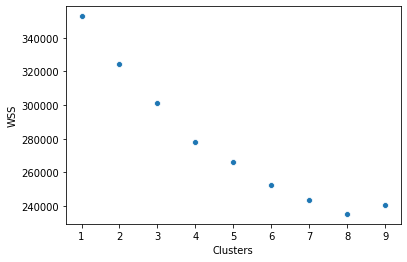

In [180]:
sns.scatterplot(x='Clusters', y='WSS', data= centroids);

In [181]:
# With optimal value of clusters
predictions = KMeans(n_clusters=5, algorithm='full', init='k-means++').fit_predict(coo)

In [182]:
clustered = pd.concat([most_rated_hikes, pd.DataFrame({'Cluster':predictions})], axis=1)

In [183]:
cluster_ID = 2
cluster = clustered[clustered.Cluster == cluster_ID].drop(['Cluster'], axis=1)

In [184]:
n_users = 1000
n_hikes = 300
cluster = sort_by_rating_density(cluster, n_hikes, n_users)

In [185]:
cluster.fillna('').head()

,Indian Peaks Wilderness,Roosevelt National Forest,Rocky Mountain National Park,Arapaho National Forest,Chautauqua Park,Pike National Forest,White River National Forest,Boulder Mountain Park,Eldorado Canyon State Park,Golden Gate Canyon State Park,...,Sloans Lake Park,Atapaho National Forest,Perry Park,Washington Park,DeKoevend Park,Dominguez Canyon Wilderness,Cottonwood Glen Park,Waverly Park,"Aurora, Colorado",Peninsula Recreation Area
119,5,4,4.33333,4.5,4,4,4,4,4,4,...,,,,,,,,,,
188,,3.42857,4.57143,,3.66667,,,4.11111,4.33333,4.33333,...,,,,,,,,,,
33,5,5,4.88,4.85714,,4.75,4.91667,,,,...,,,,,,,,,,
46,4,4.16667,4.1,4.25,4,3.75,,3.66667,4.5,,...,,,,,,,,,,
22,4.5,3.83333,4.66667,4.2,,1,4.5,3,3,,...,,,,,,,,,,


In [186]:
cluster.mean().head()

Indian Peaks Wilderness         4.497748
Roosevelt National Forest       4.325170
Rocky Mountain National Park    4.471454
Arapaho National Forest         4.334781
Chautauqua Park                 3.973958
dtype: float64

In [187]:
cluster.loc[309, :]

KeyError: 309

In [52]:
user_id = 309

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which hikes did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

In [53]:
# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated hikes are presented first
avg_ratings.sort_values(ascending=False)[:5]

Star K Ranch Park         5.0
Lake City, Colorado       5.0
Aspen, Colorado           5.0
Silverton, Colorado       5.0
Lizard Head Wilderness    5.0
Name: 0, dtype: float64